In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("cancer_classification.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [4]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

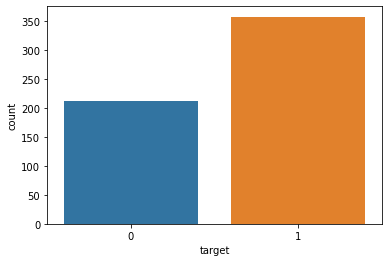

In [5]:
sns.countplot(x="target",data=df)

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [11]:
#1.initilize the ANN model

model=Sequential()

#2.Pass hidden layer

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))

#3.Pass Activation function

model.add(Dense(units=1,activation="sigmoid"))

#4.to establish the connection between layers

model.compile(optimizer="adam",loss="binary_crossentropy")

#5.train the model

model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest))

Epoch 1/600
13/13 [==============================] - 2s 29ms/step - loss: 0.6550 - val_loss: 0.5373
Epoch 2/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4593 - val_loss: 0.3967
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3425 - val_loss: 0.3151
Epoch 4/600
13/13 [==============================] - 0s 7ms/step - loss: 0.2640 - val_loss: 0.2615
Epoch 5/600
13/13 [==============================] - 0s 6ms/step - loss: 0.2082 - val_loss: 0.2238
Epoch 6/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1703 - val_loss: 0.1961
Epoch 7/600
13/13 [==============================] - 0s 7ms/step - loss: 0.1455 - val_loss: 0.1754
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1272 - val_loss: 0.1600
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1144 - val_loss: 0.1477
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1028 - val_loss: 0.1377
Epoch 11

Epoch 83/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0048 - val_loss: 0.1339
Epoch 84/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0046 - val_loss: 0.1342
Epoch 85/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.1346
Epoch 86/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.1351
Epoch 87/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.1359
Epoch 88/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.1367
Epoch 89/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.1372
Epoch 90/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.1372
Epoch 91/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0038 - val_loss: 0.1390
Epoch 92/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - val_loss: 0.1394

13/13 [==============================] - 0s 6ms/step - loss: 7.3926e-04 - val_loss: 0.1830
Epoch 164/600
13/13 [==============================] - 0s 5ms/step - loss: 7.0880e-04 - val_loss: 0.1836
Epoch 165/600
13/13 [==============================] - 0s 6ms/step - loss: 6.9591e-04 - val_loss: 0.1840
Epoch 166/600
13/13 [==============================] - 0s 5ms/step - loss: 6.9209e-04 - val_loss: 0.1844
Epoch 167/600
13/13 [==============================] - 0s 6ms/step - loss: 6.7725e-04 - val_loss: 0.1855
Epoch 168/600
13/13 [==============================] - 0s 7ms/step - loss: 6.6085e-04 - val_loss: 0.1859
Epoch 169/600
13/13 [==============================] - 0s 8ms/step - loss: 6.5183e-04 - val_loss: 0.1864
Epoch 170/600
13/13 [==============================] - 0s 5ms/step - loss: 6.4195e-04 - val_loss: 0.1867
Epoch 171/600
13/13 [==============================] - 0s 5ms/step - loss: 6.2551e-04 - val_loss: 0.1873
Epoch 172/600
13/13 [==============================] - 0s 6ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 2.1206e-04 - val_loss: 0.2215
Epoch 242/600
13/13 [==============================] - 0s 7ms/step - loss: 2.1098e-04 - val_loss: 0.2217
Epoch 243/600
13/13 [==============================] - 0s 6ms/step - loss: 2.0680e-04 - val_loss: 0.2222
Epoch 244/600
13/13 [==============================] - 0s 7ms/step - loss: 2.0434e-04 - val_loss: 0.2225
Epoch 245/600
13/13 [==============================] - 0s 7ms/step - loss: 2.0081e-04 - val_loss: 0.2233
Epoch 246/600
13/13 [==============================] - 0s 7ms/step - loss: 1.9967e-04 - val_loss: 0.2237
Epoch 247/600
13/13 [==============================] - 0s 6ms/step - loss: 1.9702e-04 - val_loss: 0.2240
Epoch 248/600
13/13 [==============================] - 0s 6ms/step - loss: 1.9482e-04 - val_loss: 0.2242
Epoch 249/600
13/13 [==============================] - 0s 6ms/step - loss: 1.9168e-04 - val_loss: 0.2248
Epoch 250/600
13/13 [==============================] - 0s 6ms/step - 

13/13 [==============================] - 0s 9ms/step - loss: 8.4021e-05 - val_loss: 0.2517
Epoch 320/600
13/13 [==============================] - 0s 7ms/step - loss: 8.3061e-05 - val_loss: 0.2521
Epoch 321/600
13/13 [==============================] - 0s 7ms/step - loss: 8.2854e-05 - val_loss: 0.2523
Epoch 322/600
13/13 [==============================] - 0s 8ms/step - loss: 8.2424e-05 - val_loss: 0.2527
Epoch 323/600
13/13 [==============================] - 0s 7ms/step - loss: 8.1952e-05 - val_loss: 0.2531
Epoch 324/600
13/13 [==============================] - 0s 7ms/step - loss: 7.9734e-05 - val_loss: 0.2533
Epoch 325/600
13/13 [==============================] - 0s 5ms/step - loss: 7.9127e-05 - val_loss: 0.2536
Epoch 326/600
13/13 [==============================] - 0s 6ms/step - loss: 7.8622e-05 - val_loss: 0.2540
Epoch 327/600
13/13 [==============================] - 0s 7ms/step - loss: 7.7408e-05 - val_loss: 0.2542
Epoch 328/600
13/13 [==============================] - 0s 5ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 3.7854e-05 - val_loss: 0.2778
Epoch 398/600
13/13 [==============================] - 0s 7ms/step - loss: 3.7533e-05 - val_loss: 0.2782
Epoch 399/600
13/13 [==============================] - 0s 6ms/step - loss: 3.7331e-05 - val_loss: 0.2787
Epoch 400/600
13/13 [==============================] - 0s 7ms/step - loss: 3.7041e-05 - val_loss: 0.2788
Epoch 401/600
13/13 [==============================] - 0s 8ms/step - loss: 3.6435e-05 - val_loss: 0.2795
Epoch 402/600
13/13 [==============================] - 0s 7ms/step - loss: 3.6456e-05 - val_loss: 0.2798
Epoch 403/600
13/13 [==============================] - 0s 6ms/step - loss: 3.5641e-05 - val_loss: 0.2799
Epoch 404/600
13/13 [==============================] - 0s 6ms/step - loss: 3.5510e-05 - val_loss: 0.2804
Epoch 405/600
13/13 [==============================] - 0s 6ms/step - loss: 3.5100e-05 - val_loss: 0.2806
Epoch 406/600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 1.8238e-05 - val_loss: 0.3016
Epoch 476/600
13/13 [==============================] - 0s 7ms/step - loss: 1.8332e-05 - val_loss: 0.3020
Epoch 477/600
13/13 [==============================] - 0s 6ms/step - loss: 1.8036e-05 - val_loss: 0.3021
Epoch 478/600
13/13 [==============================] - 0s 7ms/step - loss: 1.7762e-05 - val_loss: 0.3025
Epoch 479/600
13/13 [==============================] - 0s 6ms/step - loss: 1.7743e-05 - val_loss: 0.3027
Epoch 480/600
13/13 [==============================] - 0s 5ms/step - loss: 1.7497e-05 - val_loss: 0.3033
Epoch 481/600
13/13 [==============================] - 0s 6ms/step - loss: 1.7436e-05 - val_loss: 0.3036
Epoch 482/600
13/13 [==============================] - 0s 7ms/step - loss: 1.7196e-05 - val_loss: 0.3038
Epoch 483/600
13/13 [==============================] - 0s 7ms/step - loss: 1.7192e-05 - val_loss: 0.3040
Epoch 484/600
13/13 [==============================] - 0s 7ms/step - 

13/13 [==============================] - 0s 7ms/step - loss: 9.2960e-06 - val_loss: 0.3243
Epoch 554/600
13/13 [==============================] - 0s 8ms/step - loss: 9.2394e-06 - val_loss: 0.3247
Epoch 555/600
13/13 [==============================] - 0s 8ms/step - loss: 9.2018e-06 - val_loss: 0.3251
Epoch 556/600
13/13 [==============================] - 0s 7ms/step - loss: 9.1221e-06 - val_loss: 0.3252
Epoch 557/600
13/13 [==============================] - 0s 7ms/step - loss: 9.1085e-06 - val_loss: 0.3254
Epoch 558/600
13/13 [==============================] - 0s 7ms/step - loss: 8.9457e-06 - val_loss: 0.3257
Epoch 559/600
13/13 [==============================] - 0s 6ms/step - loss: 8.8901e-06 - val_loss: 0.3258
Epoch 560/600
13/13 [==============================] - 0s 6ms/step - loss: 8.8177e-06 - val_loss: 0.3261
Epoch 561/600
13/13 [==============================] - 0s 5ms/step - loss: 8.7875e-06 - val_loss: 0.3263
Epoch 562/600
13/13 [==============================] - 0s 5ms/step - 

In [12]:
model.history.history

{'loss': [0.6550126671791077,
  0.4592512845993042,
  0.3425174355506897,
  0.26402777433395386,
  0.20820030570030212,
  0.1703035682439804,
  0.14551499485969543,
  0.12719999253749847,
  0.11435549706220627,
  0.10280439257621765,
  0.09394059330224991,
  0.08677810430526733,
  0.08078651875257492,
  0.07549812644720078,
  0.0711241215467453,
  0.06764064729213715,
  0.06403917819261551,
  0.060884494334459305,
  0.05811905488371849,
  0.05551300197839737,
  0.053119927644729614,
  0.05034791678190231,
  0.048264458775520325,
  0.04640292748808861,
  0.04453127086162567,
  0.042195823043584824,
  0.04030829668045044,
  0.03865998983383179,
  0.03719712793827057,
  0.03586580231785774,
  0.03427926078438759,
  0.032720740884542465,
  0.031237466260790825,
  0.03008507937192917,
  0.02893958054482937,
  0.027652304619550705,
  0.026586508378386497,
  0.025629661977291107,
  0.02449043095111847,
  0.023576859384775162,
  0.022788384929299355,
  0.021822310984134674,
  0.020742064341902

<AxesSubplot:>

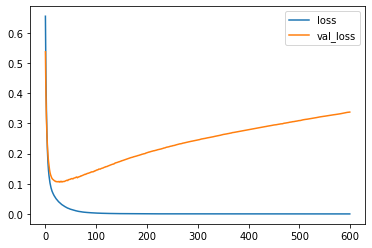

In [13]:
lossdf=pd.DataFrame(model.history.history)
lossdf.plot()

In [14]:
#1.initilize the ANN model

model=Sequential()

#2.Pass hidden layer

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))

#3.Pass Activation function

model.add(Dense(units=1,activation="sigmoid"))

#4.to establish the connection between layers

model.compile(optimizer="adam",loss="binary_crossentropy")


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [17]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/600
13/13 [==============================] - 1s 19ms/step - loss: 0.9436 - val_loss: 0.7135
Epoch 2/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5962 - val_loss: 0.5016
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4186 - val_loss: 0.3886
Epoch 4/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3228 - val_loss: 0.3232
Epoch 5/600
13/13 [==============================] - 0s 6ms/step - loss: 0.2641 - val_loss: 0.2787
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2240 - val_loss: 0.2454
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1941 - val_loss: 0.2194
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1708 - val_loss: 0.1982
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1520 - val_loss: 0.1813
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1366 - val_loss: 0.1674
Epoch 11

<AxesSubplot:>

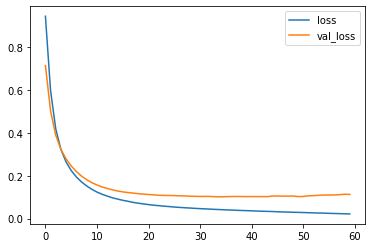

In [18]:
lossdf=pd.DataFrame(model.history.history)
lossdf.plot()

In [19]:
from tensorflow.keras.layers import Dropout

In [20]:
#1.initilize the ANN model

model=Sequential()

#2.Pass hidden layer

model.add(Dense(units=30,activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(rate=0.5))

#3.Pass Activation function

model.add(Dense(units=1,activation="sigmoid"))

#4.to establish the connection between layers

model.compile(optimizer="adam",loss="binary_crossentropy")

In [21]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/600
13/13 [==============================] - 1s 16ms/step - loss: 0.7059 - val_loss: 0.4778
Epoch 2/600
13/13 [==============================] - 0s 8ms/step - loss: 0.5814 - val_loss: 0.4012
Epoch 3/600
13/13 [==============================] - 0s 8ms/step - loss: 0.5489 - val_loss: 0.3503
Epoch 4/600
13/13 [==============================] - 0s 8ms/step - loss: 0.4449 - val_loss: 0.3113
Epoch 5/600
13/13 [==============================] - 0s 7ms/step - loss: 0.4740 - val_loss: 0.2795
Epoch 6/600
13/13 [==============================] - 0s 7ms/step - loss: 0.3895 - val_loss: 0.2521
Epoch 7/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3393 - val_loss: 0.2319
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3034 - val_loss: 0.2152
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2871 - val_loss: 0.2010
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2833 - val_loss: 0.1873
Epoch 11

<AxesSubplot:>

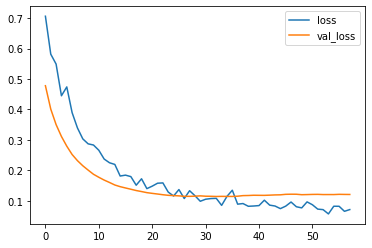

In [22]:
lossdf=pd.DataFrame(model.history.history)
lossdf.plot()

In [23]:
ypred=model.predict(xtest)

6/6 [==============================] - 0s 2ms/step


In [24]:
ypred=ypred>0.5

In [26]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

